In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets

In [185]:
df=pd.read_csv('movies.csv')

In [38]:
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [39]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Data Wrangling

In [60]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,3.510036e+07,1.636697e+08,18.576400
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.141330e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.558988e+07,7.850054e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [188]:
# Get the amount of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
budget,2171,28.3
gross,189,2.5
rating,77,1.0
company,17,0.2
runtime,4,0.1


In [189]:
df.corr()['gross'].sort_values()

score      0.186258
runtime    0.245216
year       0.257486
votes      0.630757
budget     0.740395
gross      1.000000
Name: gross, dtype: float64

In [194]:
# Replacing missing values in budget, gross and runtime with averages

mean=df['budget'].mean()
df['budget'].replace(np.nan,mean, inplace=True)

mean=df['gross'].mean()
df['gross'].replace(np.nan,mean, inplace=True)

mean=df['runtime'].mean()
df['runtime'].replace(np.nan,mean, inplace=True)

In [195]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [196]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [198]:
# Getting the accurate released year from the released column

df['released'] = df['released'].astype('string')

df['Year_Correct']=df['released'].str.extract(pat = '([0-9]{4})')

In [199]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [203]:
pd.set_option('display.max_rows',10)

In [204]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [205]:
df = df.dropna()

In [206]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
name,0,0.0
rating,0,0.0
genre,0,0.0
year,0,0.0
released,0,0.0


# DATA ANALYSIS (CORRELATION)

In [207]:
df.corr()['gross'].sort_values() #pearson, kendall, spearman

score      0.185084
runtime    0.241627
year       0.254212
votes      0.629325
budget     0.712606
gross      1.000000
Name: gross, dtype: float64

(0.0, 2991947316.709847)

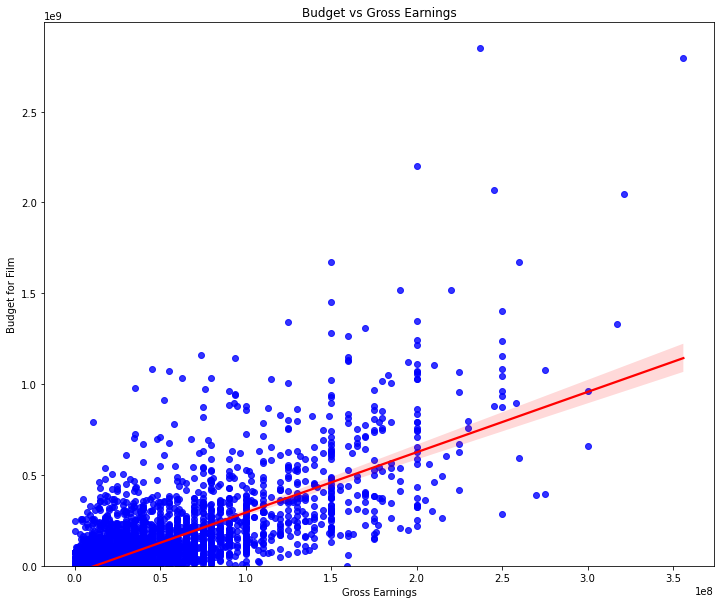

In [208]:
#Plotting the Scatter Plot to show the positive correlation between Budget and Gross Earnings

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.ylim(0,)

In [209]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


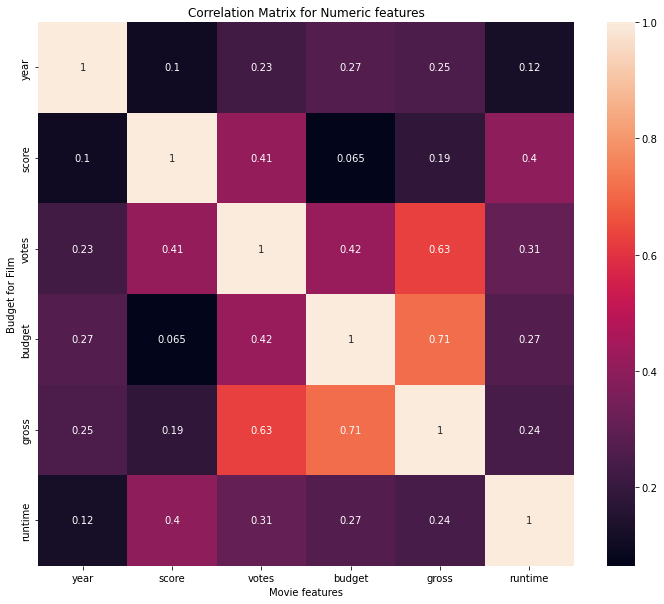

In [210]:
#Plotting a Heatmap of the Correlation Matrix

corr_matrix = df.corr()

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix for Numeric features")
plt.xlabel('Movie features')
plt.ylabel('Budget for Film')
plt.show()

In [211]:
# Numerize non-numerical data ( such as company) to aid in further analysis

df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
5445,527,5,0,2009,"December 18, 2009 (United States)",7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0,29
7445,529,5,0,2019,"April 26, 2019 (United States)",8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0,39
3045,6812,5,6,1997,"December 19, 1997 (United States)",7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0,17
6663,5076,5,0,2015,"December 18, 2015 (United States)",7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,35
7244,530,5,0,2018,"April 27, 2018 (United States)",8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,1918,1259,2112,54,35589876,1672,1829,87.0,18
2906,4339,3,5,1996,"August 30, 1996 (Denmark)",7.4,37000.0,2013,1933,1473,11,35589876,1605,327,110.0,16
3818,3319,6,4,2000,"February 9, 2001 (United States)",6.5,5200.0,717,1104,2268,54,35589876,1400,463,103.0,21
7580,4601,3,5,2019,"June 26, 2020 (United States)",5.2,735.0,1423,2176,2228,55,35589876,682,1948,93.0,40


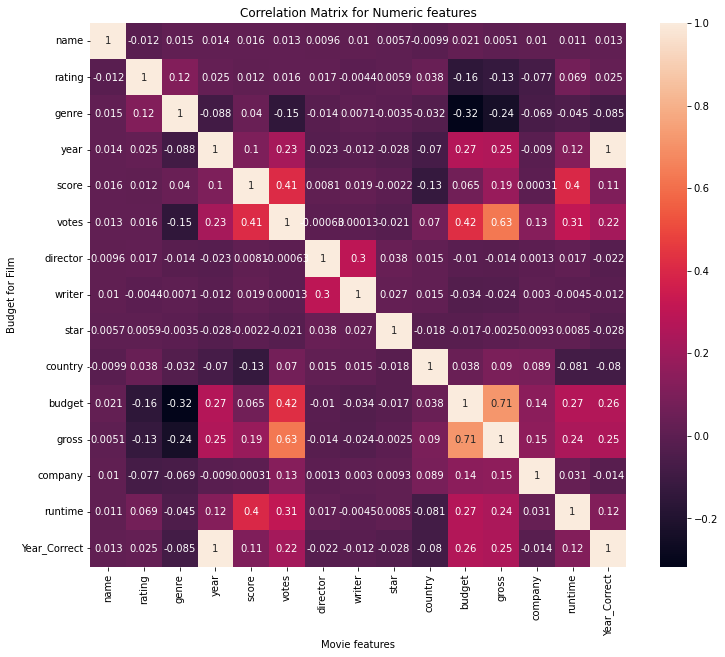

In [212]:
corr_matrix = df_numerized.corr()

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix for Numeric features")
plt.xlabel('Movie features')
plt.ylabel('Budget for Film')
plt.show()

In [213]:
df_numerized.corr()['gross'].sort_values() #pearson, kendall, spearmandf.corr()['gross'].sort_values() #pearson, kendall, spearman

genre          -0.238254
rating         -0.129388
writer         -0.023744
director       -0.014106
star           -0.002513
                  ...   
Year_Correct    0.247570
year            0.254212
votes           0.629325
budget          0.712606
gross           1.000000
Name: gross, Length: 15, dtype: float64

In [214]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.011926
              genre           0.015273
              year            0.013532
              score           0.016160
                                ...   
Year_Correct  budget          0.263069
              gross           0.247570
              company        -0.014046
              runtime         0.120361
              Year_Correct    1.000000
Length: 225, dtype: float64

In [215]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.316735
genre         budget         -0.316735
              gross          -0.238254
gross         genre          -0.238254
rating        budget         -0.156309
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_Correct  Year_Correct    1.000000
Length: 225, dtype: float64

In [216]:
# Getting the highest correlation

high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.629325
votes         gross           0.629325
gross         budget          0.712606
budget        gross           0.712606
year          Year_Correct    0.997467
                                ...   
              year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_Correct  Year_Correct    1.000000
Length: 21, dtype: float64